# Verificar a correlação entre os dados de Happyness Score X GDP per capita e Happyness Score X Healthy life expectancy, para os dados de 2018 a 2023.

## Introdução e verificação dos dados

In [1]:
# Instalando as bibliotecas
!pip install openpyxl
!pip install scipy

In [2]:
# Importando as bibliotecas
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Carregando os dados do arquivo xlsx
df = pd.read_excel("../data/report_felicidade.xlsx")

# Filtrar os dados relevantes para a análise
df = df[["Country", "Score", "GDP per capita", "Healthy life expectancy", "Year"]]

df

,Country,Score,GDP per capita,Healthy life expectancy,Year
0,Finland,7.632,1.305,0.874,2018
1,Norway,7.594,1.456,0.861,2018
2,Denmark,7.555,1.351,0.868,2018
3,Iceland,7.495,1.343,0.914,2018
4,Switzerland,7.487,1.420,0.927,2018
...,...,...,...,...,...
892,Congo (Kinshasa),3.207,0.531,0.105,2023
893,Zimbabwe,3.204,0.758,0.069,2023
894,Sierra Leone,3.138,0.670,0.092,2023
895,Lebanon,2.392,1.417,0.398,2023


In [4]:
# Filtrar os dados de 2023
df_2023 = df[df["Year"] == 2023]

df_2023

,Country,Score,GDP per capita,Healthy life expectancy,Year
760,Finland,7.804,1.888,0.535,2023
761,Denmark,7.586,1.949,0.537,2023
762,Iceland,7.530,1.926,0.559,2023
763,Israel,7.473,1.833,0.577,2023
764,Netherlands,7.403,1.942,0.545,2023
...,...,...,...,...,...
892,Congo (Kinshasa),3.207,0.531,0.105,2023
893,Zimbabwe,3.204,0.758,0.069,2023
894,Sierra Leone,3.138,0.670,0.092,2023
895,Lebanon,2.392,1.417,0.398,2023


In [5]:
# Verificar a ocorrência de valores nulos
df_2023.isnull().sum()

Country                    0
Score                      0
GDP per capita             0
Healthy life expectancy    1
Year                       0
dtype: int64

In [6]:
# Verificar a linha onde ocorre o valor nulo
df_2023[df_2023["Healthy life expectancy"].isnull()]

,Country,Score,GDP per capita,Healthy life expectancy,Year
858,State of Palestine,4.908,1.144,NaN,2023


In [7]:
# Remover a linha onde o valor é nulo, considerando a questão atual de guerra e conflitos
df_2023 = df_2023.dropna()

In [8]:
# Verificar a correlação Score e o PIB per capita
df_2023[["Score", "GDP per capita"]].corr()

,Score,GDP per capita
Score,1.000000,0.783811
GDP per capita,0.783811,1.000000


In [9]:
# Verificar a correlação entre o Score e a expectativa de vida
df_2023[["Score", "Healthy life expectancy"]].corr()

,Score,Healthy life expectancy
Score,1.000000,0.746699
Healthy life expectancy,0.746699,1.000000


### Teste de correlação de Pearson
O teste calcula o coeficiente de correlação de Pearson e o p-valor associado. O coeficiente de correlação de Pearson mede a força da correlação entre duas variáveis, enquanto o p-valor indica a probabilidade de obter uma correlação tão alta ou mais alta por acaso.

![Indice de corelação](http://leg.ufpr.br/~silvia/CE003/img288.png)


Fonte: http://leg.ufpr.br/~silvia/CE003/node74.html

In [10]:
# Utilizando o scipy para validar a correlação entre as variáveis usando o método de Pearson

# Verificar a correlação Score e o PIB per capita
stats.pearsonr(df_2023["Score"], df_2023["GDP per capita"])

PearsonRResult(statistic=0.7838113277907759, pvalue=1.6427357032406272e-29)

O valor do coeficiente de correlação de Pearson é 0.7838, o que indica uma correlação linear forte positiva entre as duas variáveis. Isso significa que, à medida que o valor de uma variável aumenta, o valor da outra variável tende a aumentar também.

O valor de pvalue é 1.6427357032406272e-29, que é praticamente zero. Isso indica que a correlação é estatisticamente significativa.

In [11]:
# Verificar a correlação entre o Score e a expectativa de vida
stats.pearsonr(df_2023["Score"], df_2023["Healthy life expectancy"])

PearsonRResult(statistic=0.7466992875668792, pvalue=1.7147000568506994e-25)

## Verificando a correlação entre as variáveis durante os anos de 2018 a 2023

In [12]:
# Criando os df para cada ano:
df_2018 = df[df["Year"] == 2018]
df_2019 = df[df["Year"] == 2019]
df_2020 = df[df["Year"] == 2020]
df_2021 = df[df["Year"] == 2021]
df_2022 = df[df["Year"] == 2022]
df_2023 = df[df["Year"] == 2023]

# Verificando valores nulos para cada ano
for df in [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]:
    print(
        f'Para o ano {df["Year"].unique()[0]} temos {df.isnull().sum().sum()} valores nulos.'
    )

Para o ano 2018 temos 0 valores nulos.
Para o ano 2019 temos 0 valores nulos.
Para o ano 2020 temos 0 valores nulos.
Para o ano 2021 temos 0 valores nulos.
Para o ano 2022 temos 0 valores nulos.
Para o ano 2023 temos 1 valores nulos.


In [13]:
# Excluindo valores nulos para o ano de 2023, condição verificada anteriormente
df_2023 = df_2023.dropna()

### Relação entre Happyness Score e GDP per capita

In [14]:
# Aplicando a correlação de Pearson para cada ano, na relação entre Score e PIB per capita
for df in [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]:
    print(
        f'Para o ano {df["Year"].unique()[0]} temos a correlação de Pearson de {stats.pearsonr(df["Score"], df["GDP per capita"])[0]}'
    )

Para o ano 2018 temos a correlação de Pearson de 0.8021239467301907
Para o ano 2019 temos a correlação de Pearson de 0.7938828678781273
Para o ano 2020 temos a correlação de Pearson de 0.7753743955405612
Para o ano 2021 temos a correlação de Pearson de 0.7897447001367903
Para o ano 2022 temos a correlação de Pearson de 0.7636771320095698
Para o ano 2023 temos a correlação de Pearson de 0.7838113277907759


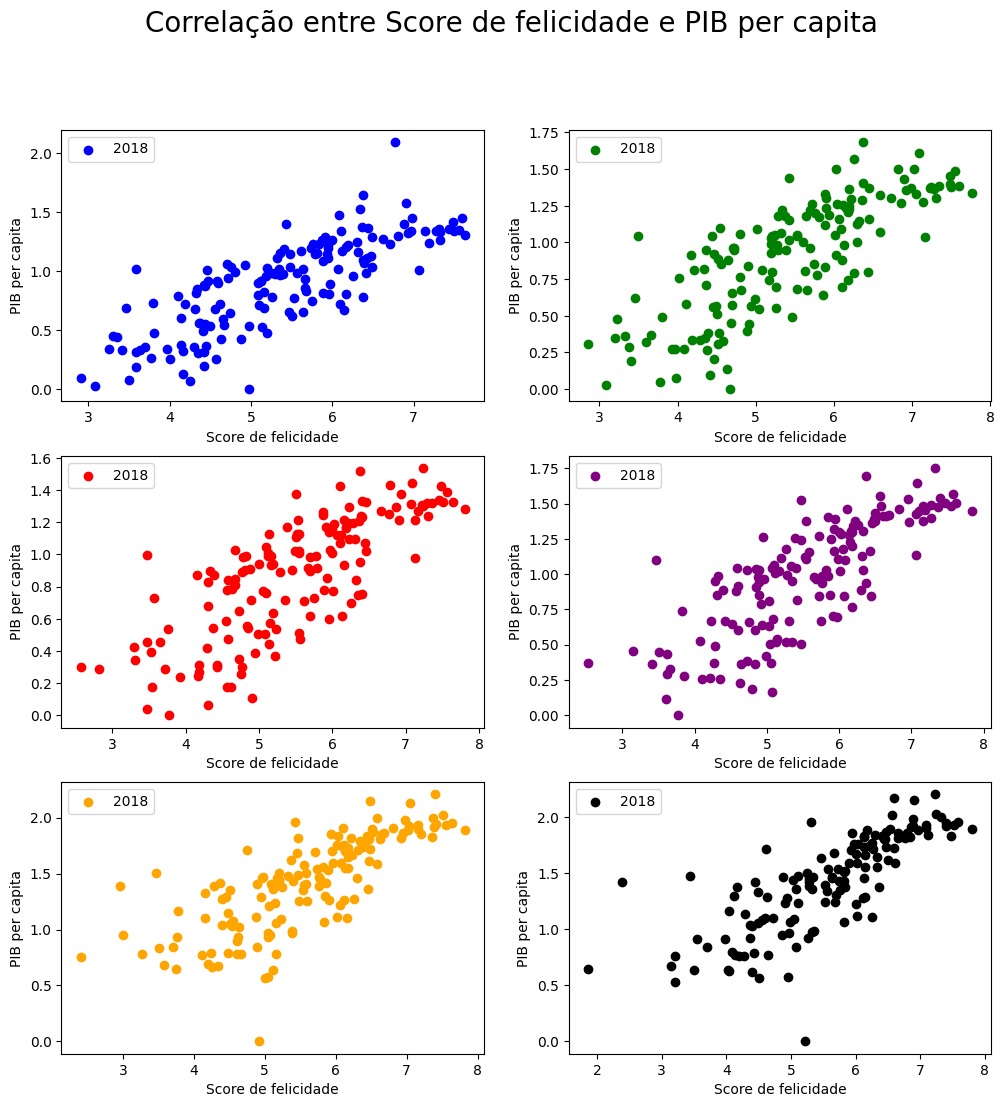

In [15]:
# Realizando a plotagem dos gráficos de dispersão para cada ano, na relação entre Score e PIB per capita

# Criando uma lista de cores para facilitar a visualização
cores = ["blue", "green", "red", "purple", "orange", "black"]

# Criando os subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Adicionando o título
plt.suptitle("Correlação entre Score de felicidade e PIB per capita", fontsize=20)

# Adicionando os gráficos de dispersão
for i, df in enumerate([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]):
    axs[i // 2, i % 2].scatter(df["Score"], df["GDP per capita"], c=cores[i])

# Adicionando os rótulos dos eixos
for ax in axs.flatten():
    ax.set_xlabel("Score de felicidade")
    ax.set_ylabel("PIB per capita")

# Adicionando legenda
for ax in axs.flatten():
    ax.legend(["2018", "2019", "2020", "2021", "2022", "2023"])


# Exibindo o gráfico
plt.show()

### Verificando a existência de outliers para o ano de 2023

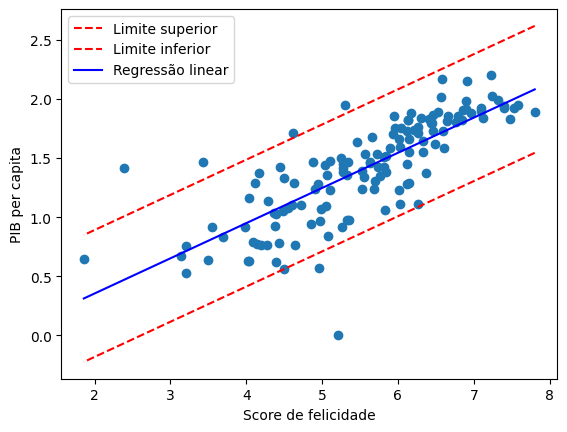

In [16]:
# Usando o método de regressão linear

# Calculando a linha de melhor ajuste (regressão linear)
m, b = np.polyfit(df_2023["Score"], df_2023["GDP per capita"], 1)

# Calculando o desvio padrão dos resíduos
residuals = df_2023["GDP per capita"] - (m * df_2023["Score"] + b)
std_dev = np.std(residuals)

# Definindo os limites de outliers (2 desvios padrão da linha de regressão)
upper_limit = m * df_2023["Score"] + b + 2 * std_dev
lower_limit = m * df_2023["Score"] + b - 2 * std_dev

# Criando o gráfico de dispersão
plt.scatter(df_2023["Score"], df_2023["GDP per capita"])

# Adicionando as linhas de limite de outliers
plt.plot(
    df_2023["Score"], upper_limit, color="red", linestyle="--", label="Limite superior"
)
plt.plot(
    df_2023["Score"], lower_limit, color="red", linestyle="--", label="Limite inferior"
)

# Adicionando a linha de regressão linear
plt.plot(
    df_2023["Score"], m * df_2023["Score"] + b, color="blue", label="Regressão linear"
)

# Adicionando rótulos aos eixos e legenda
plt.xlabel("Score de felicidade")
plt.ylabel("PIB per capita")
plt.legend()

# Exibindo o gráfico
plt.show()

In [17]:
# Retornando as informações dos outliers

# Encontrando os outliers
outliers = df_2023[
    (df_2023["GDP per capita"] < lower_limit)
    | (df_2023["GDP per capita"] > upper_limit)
]

# Criando o df com as informações dos outliers
df_outliers = outliers[["Score", "GDP per capita", "Country"]]

df_outliers

,Score,GDP per capita,Country
841,5.308,1.951,Hong Kong S.A.R. of China
847,5.211,0.000,Venezuela
856,4.954,0.570,Mozambique
865,4.614,1.714,Turkiye
868,4.501,0.561,Niger
891,3.435,1.471,Botswana
895,2.392,1.417,Lebanon


In [18]:
# Calculando a porcentagem de outliers

outliers_count = len(outliers)
total_count = len(df_2023)
outliers_percentage = (outliers_count / total_count) * 100

print("Porcentagem de outliers:", outliers_percentage)

Porcentagem de outliers: 5.147058823529411


### Relação entre Happyness Score e Healthy life expectancy

In [19]:
# Aplicando a correlação de Pearson para cada ano, na relação entre Score e expectativa de vida

for df in [df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]:
    print(
        f'Para o ano {df["Year"].unique()[0]} temos a correlação de Pearson de {stats.pearsonr(df["Score"], df["Healthy life expectancy"])[0]}'
    )

Para o ano 2018 temos a correlação de Pearson de 0.7758136033302461
Para o ano 2019 temos a correlação de Pearson de 0.7798831492425832
Para o ano 2020 temos a correlação de Pearson de 0.7703162873347793
Para o ano 2021 temos a correlação de Pearson de 0.7681378781936495
Para o ano 2022 temos a correlação de Pearson de 0.740260463056687
Para o ano 2023 temos a correlação de Pearson de 0.7466992875668792


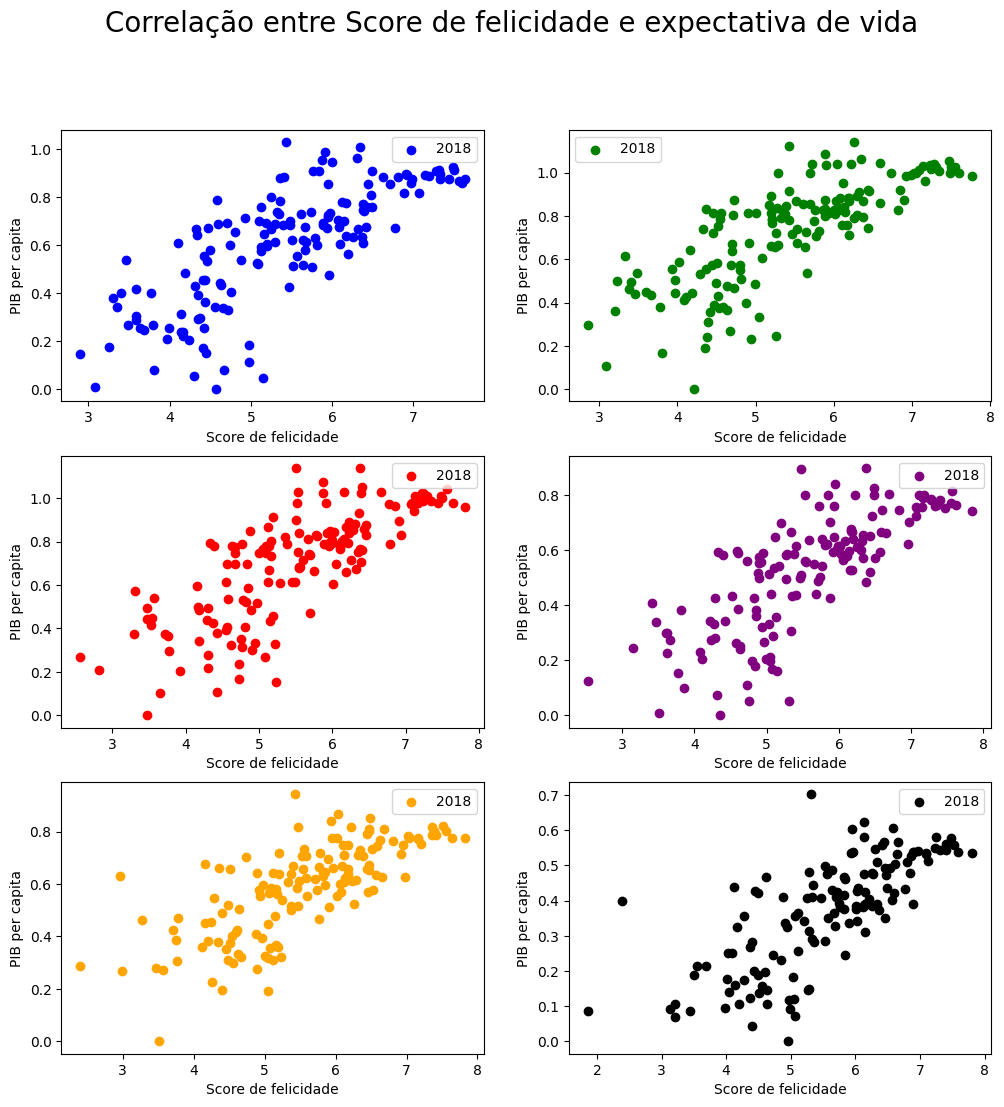

In [20]:
# Realizando a plotagem dos gráficos de dispersão para cada ano, na relação entre Score e expectativa de vida

# Crie uma lista de cores para facilitar a visualização
cores = ["blue", "green", "red", "purple", "orange", "black"]

# Criando os subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Adicionando um título ao gráfico
plt.suptitle("Correlação entre Score de felicidade e expectativa de vida", fontsize=20)

# Adicionando os gráficos de dispersão
for i, df in enumerate([df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]):
    axs[i // 2, i % 2].scatter(df["Score"], df["Healthy life expectancy"], c=cores[i])

# Adicionando rótulos aos eixos
for ax in axs.flatten():
    ax.set_xlabel("Score de felicidade")
    ax.set_ylabel("PIB per capita")

# Adicionando legendas aos gráficos
for ax in axs.flatten():
    ax.legend(["2018", "2019", "2020", "2021", "2022", "2023"])


# Exibindo o gráfico
plt.show()

### Verificando a existência de outliers para o ano de 2023

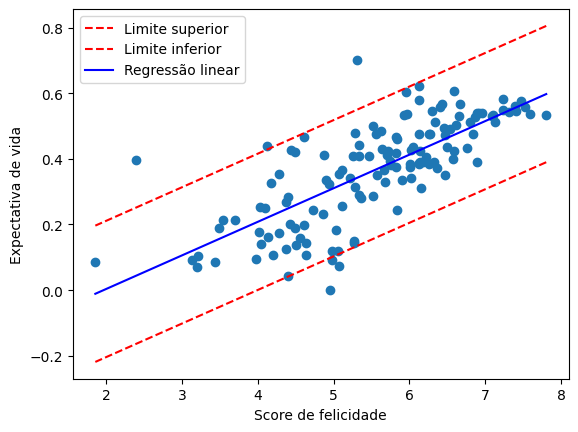

In [21]:
# Calculando a linha de melhor ajuste (regressão linear)
m, b = np.polyfit(df_2023["Score"], df_2023["Healthy life expectancy"], 1)

# Calculando o desvio padrão dos resíduos
residuals = df_2023["Healthy life expectancy"] - (m * df_2023["Score"] + b)
std_dev = np.std(residuals)

# Definindo os limites de outliers (2 desvios padrão da linha de regressão)
upper_limit = m * df_2023["Score"] + b + 2 * std_dev
lower_limit = m * df_2023["Score"] + b - 2 * std_dev

# Criando o gráfico de dispersão
plt.scatter(df_2023["Score"], df_2023["Healthy life expectancy"])

# Adicionando as linhas de limite de outliers
plt.plot(
    df_2023["Score"], upper_limit, color="red", linestyle="--", label="Limite superior"
)
plt.plot(
    df_2023["Score"], lower_limit, color="red", linestyle="--", label="Limite inferior"
)

# Adicionando a linha de regressão linear
plt.plot(
    df_2023["Score"], m * df_2023["Score"] + b, color="blue", label="Regressão linear"
)

# Adicionando rótulos aos eixos e legenda
plt.xlabel("Score de felicidade")
plt.ylabel("Expectativa de vida")
plt.legend()

# Exibindo o gráfico
plt.show()

In [22]:
# Retornando as informações dos outliers

# Econtrando os outliers
outliers = df_2023[
    (df_2023["Healthy life expectancy"] < lower_limit)
    | (df_2023["Healthy life expectancy"] > upper_limit)
]

# Criando o df com as informações dos outliers
df_outliers = outliers[["Score", "Healthy life expectancy", "Country"]]

df_outliers

,Score,Healthy life expectancy,Country
841,5.308,0.702,Hong Kong S.A.R. of China
850,5.072,0.072,Guinea
854,4.981,0.092,Nigeria
856,4.954,0.000,Mozambique
882,4.120,0.438,Jordan
895,2.392,0.398,Lebanon


In [23]:
# Calculando a porcentagem de outliers

outliers_count = len(outliers)
total_count = len(df_2023)
outliers_percentage = (outliers_count / total_count) * 100

print("Porcentagem de outliers:", outliers_percentage)

Porcentagem de outliers: 4.411764705882353


# Resultados e Conclusões